In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 9

In [3]:
df = pd.read_csv("Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### (a)


**quantitative predictors**: mpg,mdisplacement, horsepower, weight, acceleration, cylinders, year

**qualitative**: origin, name

### (b) and (c)

In [12]:
sums = df.describe()
row = sums.loc["max"] - sums.loc["min"]
row.name = "range"
sums.append(row)

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000
range,37.600000,5.000000,387.000000,3527.000000,16.800000,12.000000,2.000000


### (d)

In [20]:
df1 = df.drop(df.index[range(9,85)])
sums = df1.describe()
row = sums.loc["max"] - sums.loc["min"]
row.name = "range"
sums.append(row)

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,24.438629,5.370717,187.049844,2933.962617,15.723053,77.152648,1.598131
std,7.908184,1.653486,99.635385,810.642938,2.680514,3.111230,0.816163
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000
range,35.600000,5.000000,387.000000,3348.000000,16.300000,12.000000,2.000000


### (e)

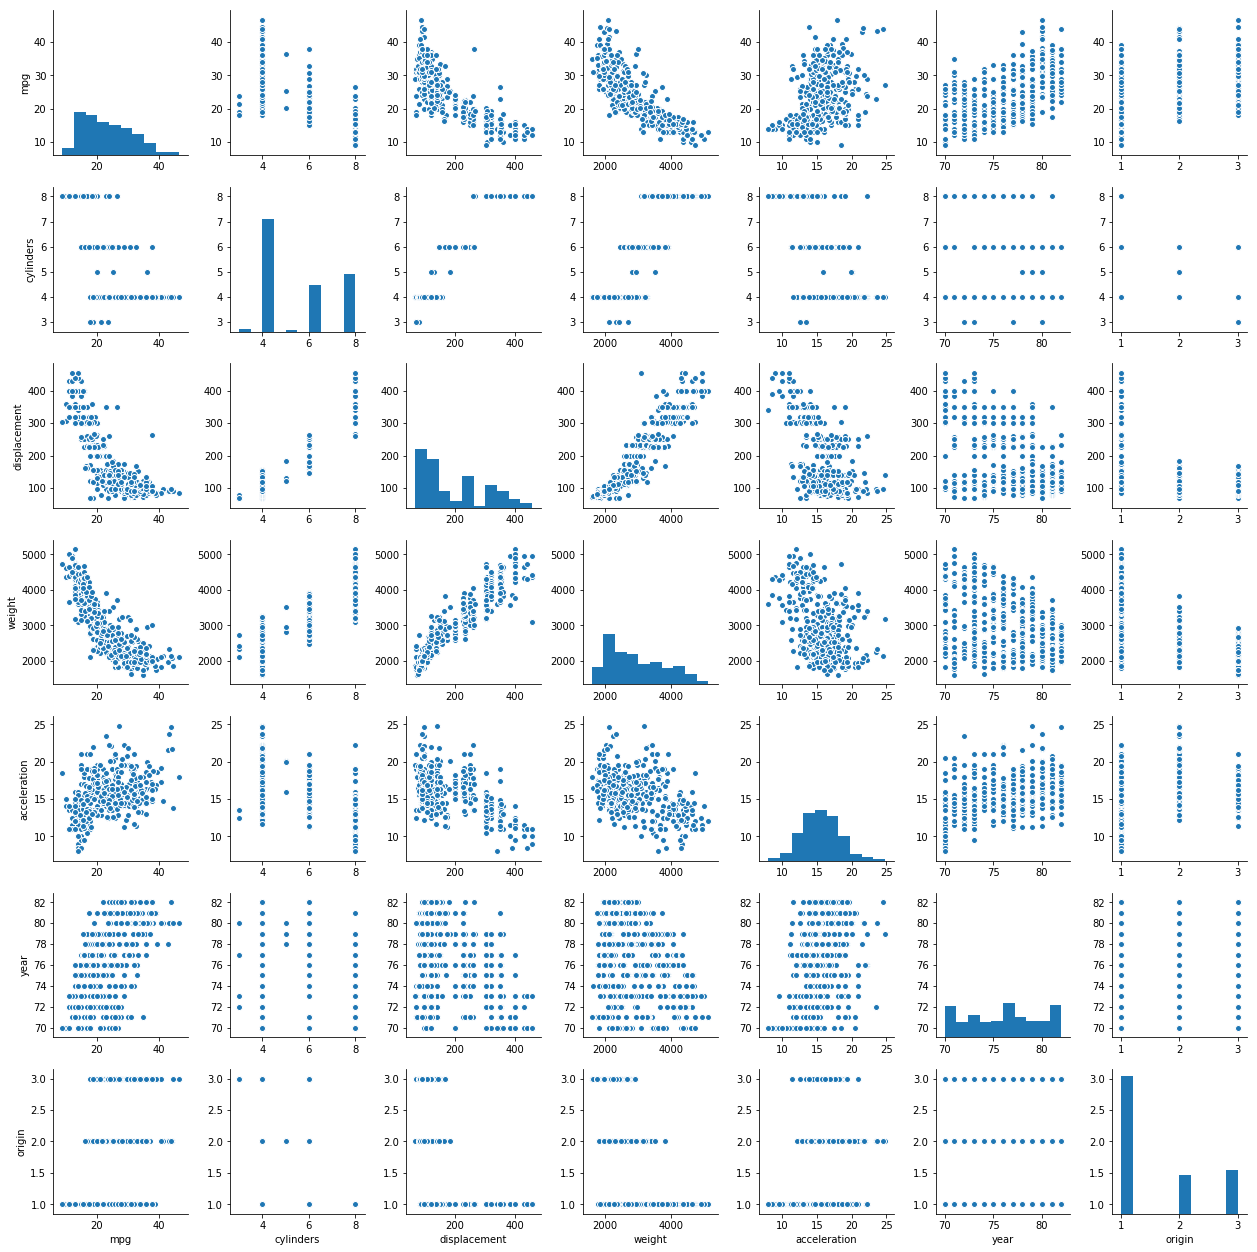

In [21]:
sns.pairplot(df)

Based off of the scatter plots it looks to me like number of cylinders, displacement, and weight are negatively correlated with mpg while year and origin are positively correlated.  Other corrlations include a positive relationship between weight and displacement and weight and cylinders.

### (f)

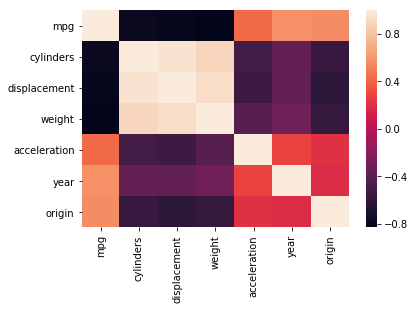

In [31]:
sns.heatmap(df.iloc[:,:-1].corr())

Looking at the heatmap of the correlation between the predictors you can see the darker the color the more negative the corrlation. Notice the mpg row is black (~-0.8) which is a high negative correlation. for cylinders, displacement, and weight.

## 10


In [33]:
from sklearn.datasets import load_boston
boston = load_boston()

bos = pd.DataFrame(data= boston.data,
                     columns= boston.feature_names )
bos['MEDV'] = boston.target

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [43]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### (b)

My findings are associated with the MEDV variable as it is most likely the variable we would want to predict. Looking at both the pair plots as well as the correlation heatmap we can see that LSTAT (% of low status population) is highly negatively related while RM (number of rooms) is highly positively correlated. However other relationships are interesting such as DIS (distance from employment centers) and AGE, NOX, and INDUS are all highly negatively correlated with DIS. This means the older the home, more nitric oxides, and more industrial areas are all closer to the employment zones in Boston.

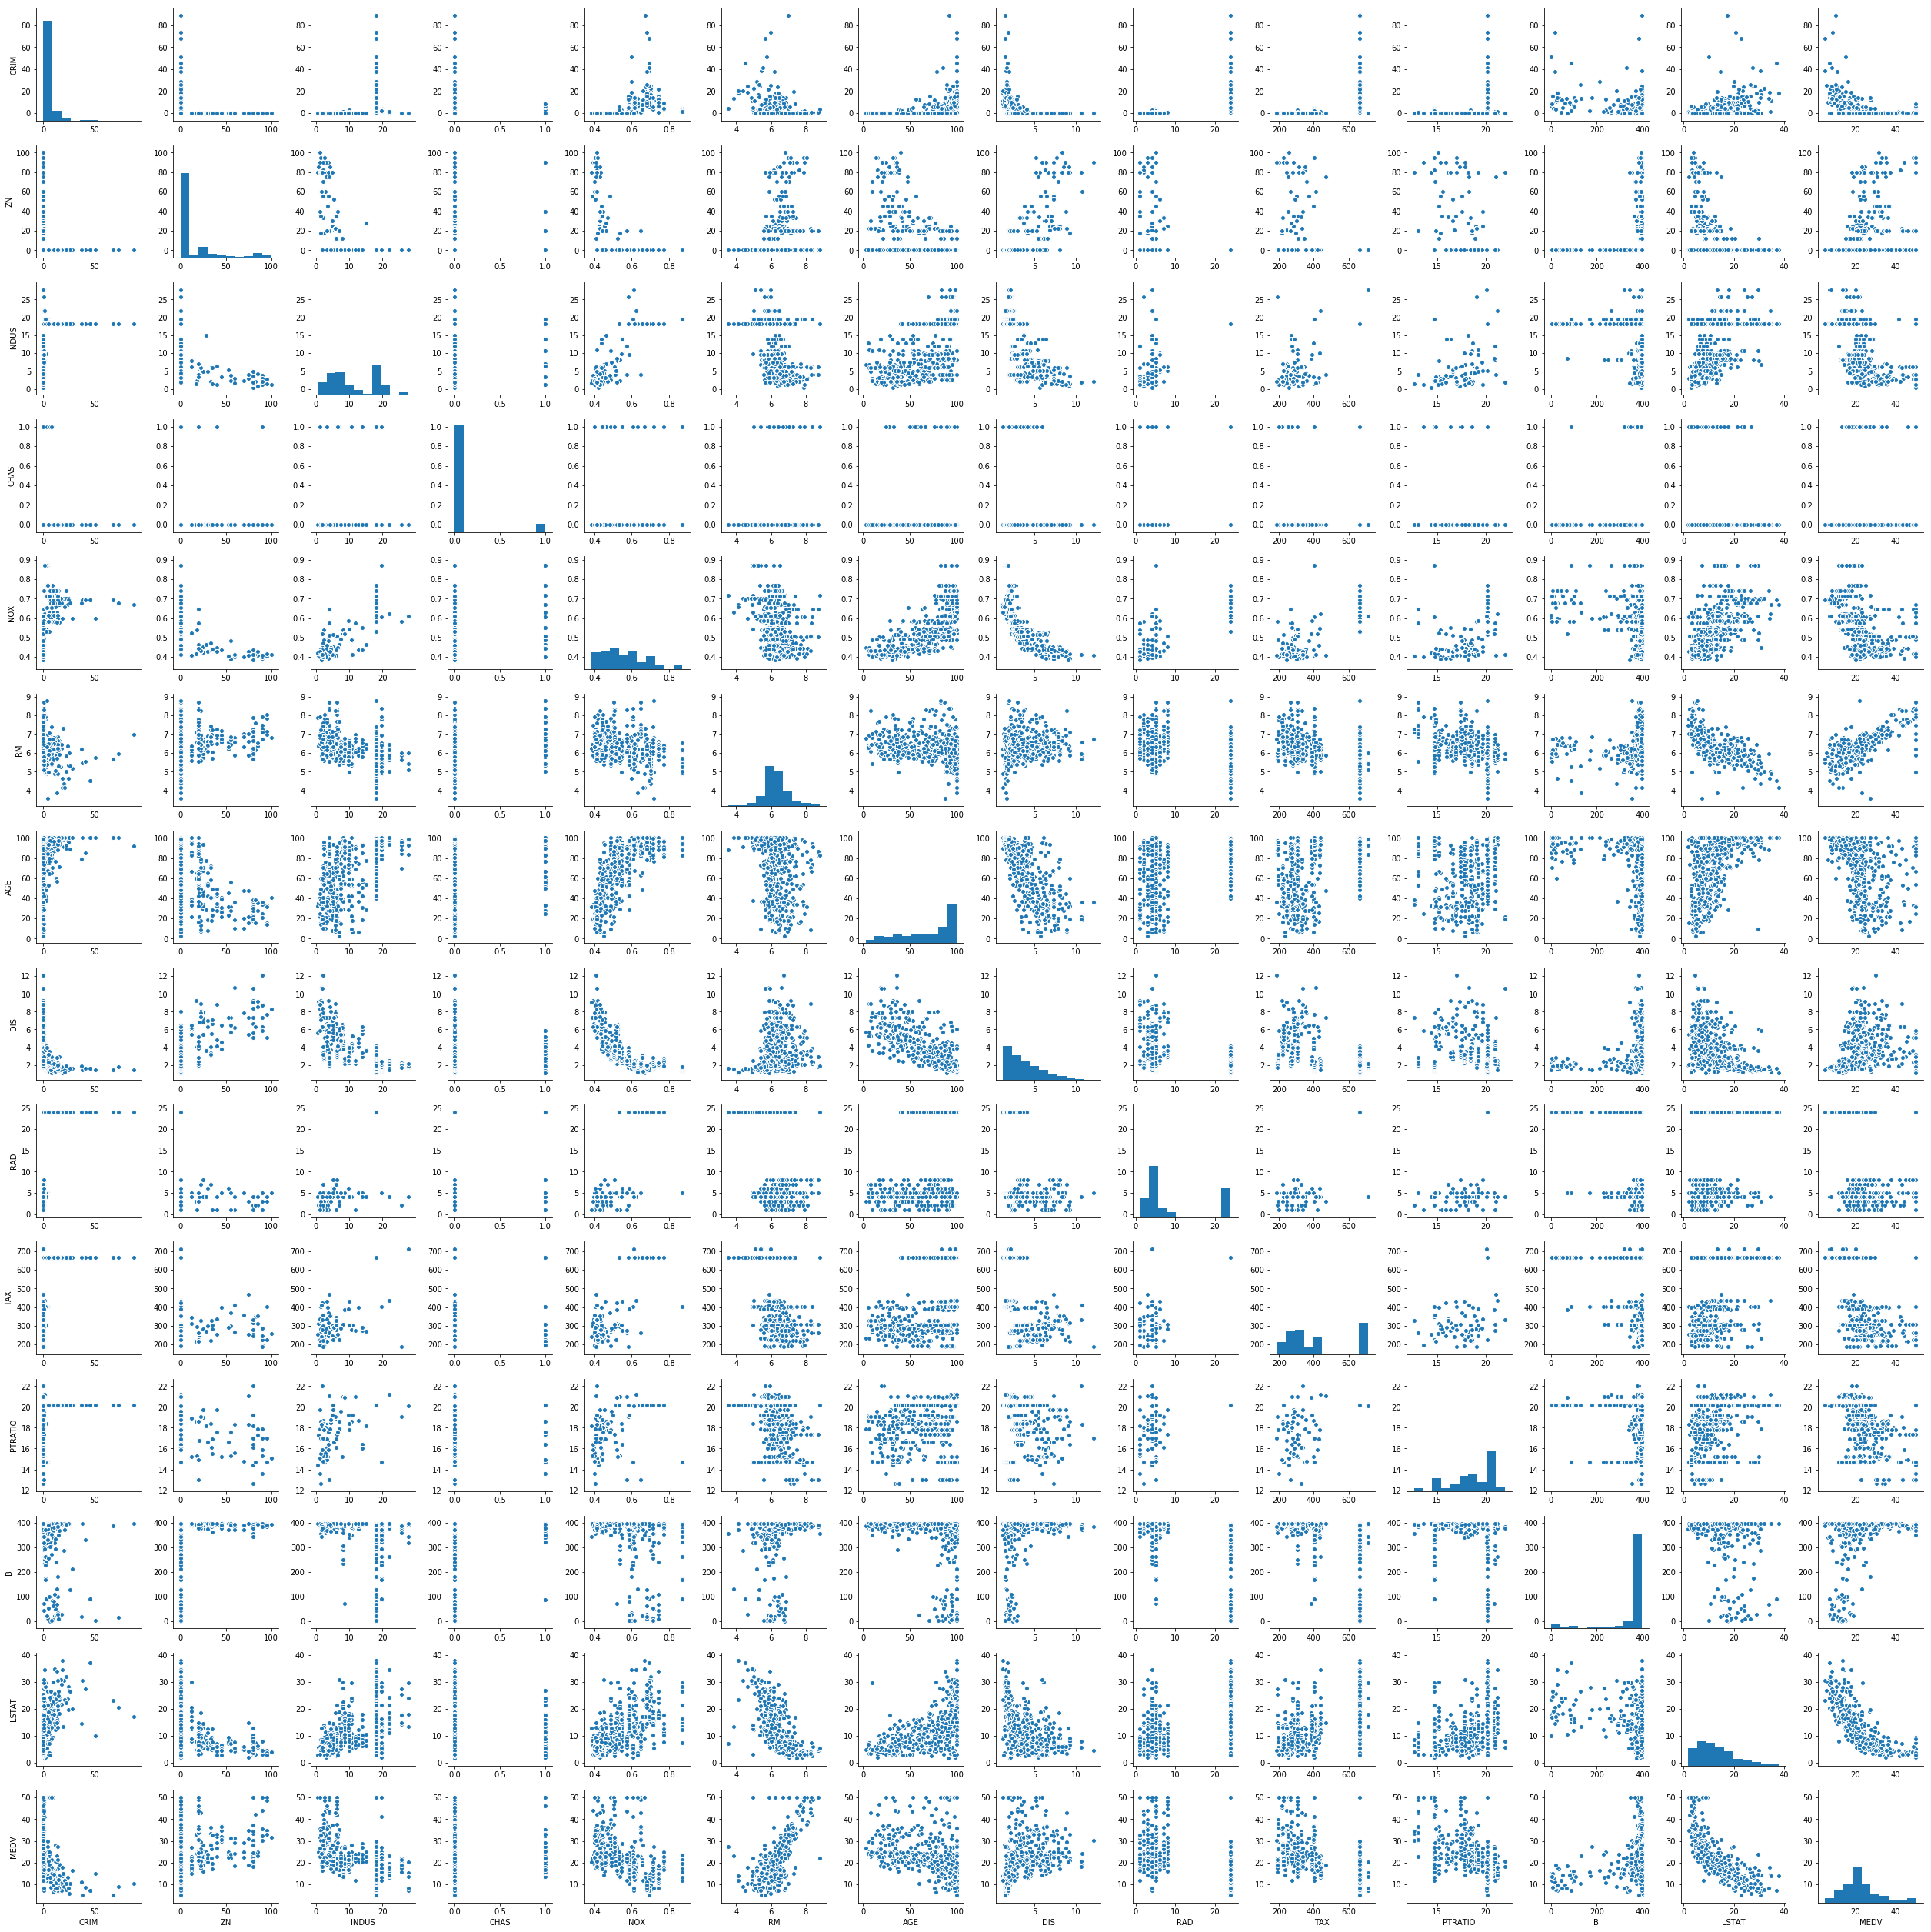

In [34]:
sns.pairplot(bos)

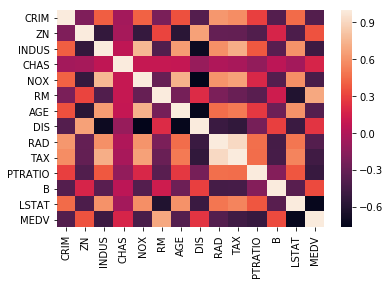

In [35]:
sns.heatmap(bos.corr())

### (c)

Looking at both plots above it seems that there might be a slight negative relationship between DIS and CRIM and MEDV and CRIM. 

### (d)

In [45]:
# suburb is anything farther away from the employment centers i.e. DIS > mean(DIS)
burbs = bos[bos["DIS"]> bos["DIS"].mean()]
burbs.sort_values(["CRIM"], ascending=False).head()
# 485 and 483 have relatively high crime rates compared with the rest of the . 
# 483 especially is near the mean of all neighborhoods


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
485,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6


In [51]:
print("Tax mean for all neighborhoods: "+ str(bos['TAX'].mean()))
burbs.sort_values(["TAX"], ascending=False).head()
# again 485 and 483 are well above the rest of the suburbs and well above the mean for all areas.

Tax mean for all neighborhoods: 408.2371541501976


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
485,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
330,0.04544,0.0,3.24,0.0,0.460,6.144,32.2,5.8736,4.0,430.0,16.9,368.57,9.09,19.8
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6


In [55]:
print("Tax mean for all neighborhoods: "+ str(bos['PTRATIO'].mean()))
burbs.sort_values(["PTRATIO"], ascending=True)
# Many of the areas in the suburbs seem to have very low PTRATIOs especially 196-198

Tax mean for all neighborhoods: 18.455533596837967


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
196,0.04011,80.0,1.52,0.0,0.4040,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0.0,0.4040,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0.0,0.4040,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
202,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
201,0.03445,82.5,2.03,0.0,0.4150,6.162,38.4,6.2700,2.0,348.0,14.7,393.77,7.43,24.1
299,0.05561,70.0,2.24,0.0,0.4000,7.041,10.0,7.8278,5.0,358.0,14.8,371.58,4.74,29.0


### (e)

In [57]:
burbs['CHAS'].sum()

11.0

### (f)

In [58]:
bos['PTRATIO'].mean()

18.455533596837967

### (g)

In [60]:
bos[bos["MEDV"] == bos["MEDV"].min()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [62]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


These two areas have very high crime, 0 residential zoning, high amounts of non-retail businesses, high nitric oxides, high tax rates,  high pupil-teacher ratios, and high lower status population. By high I mean >75th percentile.

### (h)

In [64]:
bos[bos["RM"] > 7]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0.0,0.4280,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0.0,0.4030,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05,33.0
88,0.05660,0.0,3.41,0.0,0.4890,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6
89,0.05302,0.0,3.41,0.0,0.4890,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
99,0.06860,0.0,2.89,0.0,0.4450,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19,33.2


In [65]:
bos[bos["RM"] > 8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0


For the most part these higher room areas have lower tax rates, lower number of low status population, and most obviously a very high median value.